# Solar Handling Functions

Thank you for your interest in learning more about the Plan.It functionalities! This notebook will demonstrate how the functions used to handle and calculate information regarding solar energy are used. 

To run this notebook, the modules need to be imported.

In [45]:
import dateutil

import h5pyd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import location_handling
import solar_handling

In [2]:
# Wind Toolkits dataset is loaded from NREL using API key
f = h5pyd.File("/nrel/wtk-us.h5", 'r')  

***

### New York City Demonstrations

First, we use the ``location_handling.get_loc`` function that allows us to extract out latitude and longitude values as a tuple at a specific "City", "State_id" combination. In this demonstration, we will use New York City.

In [12]:
NYC = location_handling.get_loc("New York", "NY")
print("The latitude of New York City is %s" % NYC[0])
print("The longitude of New York City is %s" % NYC[1])

The latitude of New York City is 40.6943
The longitude of New York City is -73.9249


Next, we use the ``location_handling.wtk_locator`` function, which finds the nearest latitude and longitude weather/data station and outputs the latitude and longitude indices in a tuple that correlate with that location in the dataset.

In [14]:
NYC_idx = location_handling.wtk_locator(f, NYC)
print("The location index of New York City is %s" % str(NYC_idx))

The location index of New York City is (1044, 2378)


***

The entire solar_handling function capabilities are wrapped up in the ``solar_handling.annual_solar_mean`` functions which takes the annual amount of energy generated from solar resources from the years 2007-2013 and calculates the mean. So, this functions calls ``solar_handling.annual_solar_energy``, which then in turn calls ``solar_handling.create_ghi_tseries`` function.

The first function to be used, ``tseries_list`` breaks down the date and time of the dataset into each individual year, with a data point for each individual hour. It then extracts the global horizontal incidence (GHI) for each of those time points and contructs an array that contains the GHI information for each year.

In [36]:
tseries_list = solar_handling.create_ghi_tseries(f, NYC_idx)
tseries_list

[array([ 0.     ,  0.     ,  0.     , ..., 45.02246,  0.     ,  0.     ],
       dtype=float32),
 array([ 0.      ,  0.      ,  0.      , ..., 10.666199,  0.      ,
         0.      ], dtype=float32),
 array([ 0.      ,  0.      ,  0.      , ..., 25.658447,  0.      ,
         0.      ], dtype=float32),
 array([ 0.      ,  0.      ,  0.      , ..., 11.101135,  0.      ,
         0.      ], dtype=float32),
 array([ 0.     ,  0.     ,  0.     , ..., 42.98535,  0.     ,  0.     ],
       dtype=float32),
 array([ 0.      ,  0.      ,  0.      , ..., 17.555786,  0.      ,
         0.      ], dtype=float32),
 array([ 0.      ,  0.      ,  0.      , ..., 45.251343,  0.      ,
         0.      ], dtype=float32)]

In [41]:
NYC07_tseries = tseries_list[0]
NYC07_tseries

array([ 0.     ,  0.     ,  0.     , ..., 45.02246,  0.     ,  0.     ],
      dtype=float32)

In [31]:
dt = f['datetime']
dt = pd.DataFrame({'datetime':dt[:]}, index = range(0, dt.shape[0]))
dt['datetime'] = dt['datetime'].apply(dateutil.parser.parse)

twenty07 = dt.loc[(dt.datetime >= '2007-01-01') &
                  (dt.datetime < '2008-01-01')]

In [42]:
GHI_2007 = pd.DataFrame(NYC07_tseries, columns=['GHI ($W/m^2$)'])
GHI_2007['DateTime'] = twenty07
GHI_2007.set_index('DateTime')

,GHI ($W/m^2$)
DateTime,
2007-01-01 00:00:00,0.000000
2007-01-01 01:00:00,0.000000
2007-01-01 02:00:00,0.000000
2007-01-01 03:00:00,0.000000
2007-01-01 04:00:00,0.000000
...,...
2007-12-31 19:00:00,336.695465
2007-12-31 20:00:00,202.223267
2007-12-31 21:00:00,45.022461


Next, ``annual_solar_energy`` takes the data series at each year and applies the parameters of a typical commercial solar panel to determine how much energy it would generate from the solar resources available at each hour. So, it uses a solar panel that has 20% efficiency at converting irradiance into energy, it has an area of 65 in x 39 in, or ~1.635 $m^2$, and it converts the energy into kilowatt hours rather than watt hours. Finally, this function sums together each individual year to determine how much of the solar resources could have been converted to energy by a single solar panel in New York City.

In [8]:
annual_solar_energy = solar_handling.annual_solar_energy(f, NYC_idx)

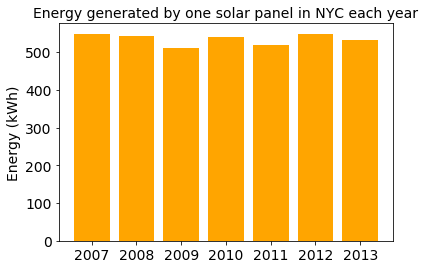

In [62]:
plt.bar(x=np.arange(2007, 2014), height=annual_solar_energy, color = 'orange')
plt.ylabel('Energy (kWh)', fontsize=14)
plt.title('Energy generated by one solar panel in NYC each year', fontsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=12)

Finally, ``annual_solar_mean`` average the above values to determine how much energy a single solar panel can produce at the specific location annually.

In [65]:
annual_solar_mean = solar_handling.annual_solar_mean(f, NYC_idx)
print("Average energy generated annually by a single solar panel in New York City is %s kWh" % str(round(annual_solar_mean, 2)))

Average energy generated annually by a single solar panel in New York City is 534.54 kWh


### Try a different location yourself:

In [66]:
# Input a city name and its state_id within the quotation marks.
# For example, city = "Seattle" and state = "WA"
city = ""
state = ""

In [67]:
location = location_handling.get_loc(city, state)
loc_idx = location_handling.wtk_locator(f, location)

In [69]:
annual_solar_mean = solar_handling.annual_solar_mean(f, loc_idx)
print("Average energy generated annually by a single solar panel in %s is %s kWh" % (city, str(round(annual_solar_mean, 2))))

Average energy generated annually by a single solar panel in Seattle is 462.66 kWh
